In [1]:
print("as")

as	


In [2]:
b = {}
print(b)

{
}


In [4]:
b[2] = 30
print(b)

{
  2 : 30
}


In [9]:
for i=2,#b do
--     print('hello')
    print(b[i])
end

30	


In [10]:
a = torch.Tensor(5,3)

In [18]:
a = torch.rand(5,3)
b = torch.rand(3,4)
c = a*b
print(c)

 1.3959  0.6097  0.2272  0.7579
 1.6890  0.7654  0.3566  1.0577
 1.2062  0.6639  0.2791  0.9630
 0.5965  0.4077  0.0874  0.5354
 1.1271  0.6314  0.2095  0.8545
[torch.DoubleTensor of size 5x4]



In [22]:
torch.mm(a,b)

 1.3959  0.6097  0.2272  0.7579
 1.6890  0.7654  0.3566  1.0577
 1.2062  0.6639  0.2791  0.9630
 0.5965  0.4077  0.0874  0.5354
 1.1271  0.6314  0.2095  0.8545
[torch.DoubleTensor of size 5x4]



In [2]:
require 'nn';

In [5]:

net = nn.Sequential()

-- 1 input image channel, 6 output channels, 5x5 convolution kernel
net:add(nn.SpatialConvolution(1, 6, 5, 5))
-- non-linearity
net:add(nn.ReLU())
-- A max-pooling operation that looks at 2x2 windows and finds the max
net:add(nn.SpatialMaxPooling(2,2,2,2))
net:add(nn.SpatialConvolution(6, 16, 5, 5))
net:add(nn.ReLU())
net:add(nn.SpatialMaxPooling(2,2,2,2))
net:add(nn.View(16*5*5))
net:add(nn.Linear(16*5*5, 120))
net:add(nn.ReLU())
net:add(nn.Linear(120, 84))
net:add(nn.ReLU())
net:add(nn.Linear(84, 10))
net:add(nn.LogSoftMax())

print('Lenet5\n' .. net:__tostring())




Lenet5
nn.Sequential {
  [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> (7) -> (8) -> (9) -> (10) -> (11) -> (12) -> (13) -> output]
  (1): nn.SpatialConvolution(1 -> 6, 5x5)
  (2): nn.ReLU
  (3): nn.SpatialMaxPooling(2x2, 2,2)
  (4): nn.SpatialConvolution(6 -> 16, 5x5)
  (5): nn.ReLU
  (6): nn.SpatialMaxPooling(2x2, 2,2)
  (7): nn.View(400)
  (8): nn.Linear(400 -> 120)
  (9): nn.ReLU
  (10): nn.Linear(120 -> 84)
  (11): nn.ReLU
  (12): nn.Linear(84 -> 10)
  (13): nn.LogSoftMax
}	


In [8]:
input = torch.rand(1,32,32)
output = net:forward(input)
print(output)

-2.2593
-2.3320
-2.3196
-2.2942
-2.3093
-2.3310
-2.2065
-2.3042
-2.3532
-2.3249
[torch.DoubleTensor of size 10]



In [13]:
net:zeroGradParameters()
gradInput = net:backward(input, torch.rand(10))
-- print(#gradInput)
-- print(gradInput)

In [20]:
criterion = nn.ClassNLLCriterion()
print(criterion:forward(output, 3))
gradients = criterion:backward(output, 1)
print(gradients)

2.3195872666718	1	
-1
 0
 0
 0
 0
 0
 0
 0
 0
 0
[torch.DoubleTensor of size 10]



In [21]:
m = nn.SpatialConvolution(1,3,2,2)

In [22]:
print(m.weight)

(1,1,.,.) = 
 -0.2240 -0.3279
 -0.4103  0.1833

(2,1,.,.) = 
  0.4879 -0.1554
 -0.3297 -0.3170

(3,1,.,.) = 
  0.1105 -0.3612
 -0.2328  0.1298
[torch.DoubleTensor of size 3x1x2x2]



In [23]:
print(m.bias)

 0.1082
 0.0032
-0.4333
[torch.DoubleTensor of size 3]



In [3]:
-- require 'image'
-- require 'audio'
-- require 'paths'
-- if (not paths.filep("cifar10torchsmall.zip")) then
--     os.execute('wget -c https://s3.amazonaws.com/torch7/data/cifar10torchsmall.zip')
--     os.execute('unzip cifar10torchsmall.zip')
-- end

-- trainset = torch.load('cifar10-train.t7')
-- testset = torch.load('cifar10-text.t7')
-- classes = {'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'}

-- print(trainset)

require 'paths'
if (not paths.filep("cifar10torchsmall.zip")) then
    os.execute('wget -c https://s3.amazonaws.com/torch7/data/cifar10torchsmall.zip')
    os.execute('unzip cifar10torchsmall.zip')
end
trainset = torch.load('cifar10-train.t7')
testset = torch.load('cifar10-test.t7')
classes = {'airplane', 'automobile', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck'}



In [4]:
print(trainset)

{
  data : ByteTensor - size: 10000x3x32x32
  label : ByteTensor - size: 10000
}


In [5]:
print(#trainset.data)

 10000
     3
    32
    32
[torch.LongStorage of size 4]



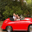

automobile	


In [11]:
itorch.image(trainset.data[100])
print(classes[trainset.label[100]])

In [9]:
-- ignore setmetatable for now, it is a feature beyond the scope of this tutorial. It sets the index operator.
setmetatable(trainset, 
    {__index = function(t, i) 
                    return {t.data[i], t.label[i]} 
                end}
);
trainset.data = trainset.data:double()

function trainset:size()
    return self.data:size(1)
end


In [ ]:
print(trainset.data)

In [ ]:
print(trainset:size())

In [ ]:
print(trainset[33])
itorch.image(trainset[33][1])

In [ ]:
-- this picks {all images, 1st channel, all vertical pixels, all horizontal pixels}
redChannel = trainset.data[{ {151,300}, {1}, {}, {} }]

print(#redChannel)


In [8]:
mean = {} -- store the mean, to normalize the test set in the future
stdv = {} -- store the standard-deviation for the future
for i=1,3 do -- over each image channel
    mean[i] = trainset.data[{ {}, {i}, {}, {} }]:mean() -- mean esitmation
    print('Channel ' .. i .. ', Mean: ' .. mean[i])
    trainset.data[{ {}, {i}, {}, {} }]:add(-mean[i]) -- mean subtraction
    
    stdv[i] = trainset.data[{ {}, {i}, {}, {} }]:std() -- std estimation
    print('Channel ' .. i .. ', Standard Deviation: ' .. stdv[i])
    trainset.data[{ {}, {i}, {}, {} }]:div(stdv[i]) -- std scaling
end


    
    
    

[string "mean = {} -- store the mean, to normalize the..."]:4: attempt to call method 'mean' (a nil value)
stack traceback:
	[string "mean = {} -- store the mean, to normalize the..."]:4: in main chunk
	[C]: in function 'xpcall'
	/home/vagrant/torch/install/share/lua/5.1/itorch/main.lua:210: in function </home/vagrant/torch/install/share/lua/5.1/itorch/main.lua:174>
	/home/vagrant/torch/install/share/lua/5.1/lzmq/poller.lua:75: in function 'poll'
	...e/vagrant/torch/install/share/lua/5.1/lzmq/impl/loop.lua:307: in function 'poll'
	...e/vagrant/torch/install/share/lua/5.1/lzmq/impl/loop.lua:325: in function 'sleep_ex'
	...e/vagrant/torch/install/share/lua/5.1/lzmq/impl/loop.lua:370: in function 'start'
	/home/vagrant/torch/install/share/lua/5.1/itorch/main.lua:389: in main chunk
	[C]: in function 'require'
	(command line):1: in main chunk
	[C]: at 0x00406670: 

In [49]:
require 'nn'

net = nn.Sequential()
net:add(nn.SpatialConvolution(3, 6, 5, 5)) -- 3 input image channels, 6 output channels, 5x5 convolution kernel
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.SpatialMaxPooling(2,2,2,2))     -- A max-pooling operation that looks at 2x2 windows and finds the max.
net:add(nn.SpatialConvolution(6, 16, 5, 5))
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.SpatialMaxPooling(2,2,2,2))
net:add(nn.View(16*5*5))                    -- reshapes from a 3D tensor of 16x5x5 into 1D tensor of 16*5*5
net:add(nn.Linear(16*5*5, 120))             -- fully connected layer (matrix multiplication between input and weights)
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.Linear(120, 84))
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.Linear(84, 10))                   -- 10 is the number of outputs of the network (in this case, 10 digits)
net:add(nn.LogSoftMax())                     -- converts the output to a log-probability. Useful for classification problems

criterion = nn.ClassNLLCriterion()
trainer = nn.StochasticGradient(net, criterion)
trainer.learningRate = 0.001
trainer.maxIteration = 5 -- just do 5 epochs of training.


In [50]:
trainer:train(trainset)


# StochasticGradient: training	


# current error = 2.2214433898642	


# current error = 1.9234136283678	


# current error = 1.7086791338919	


# current error = 1.5858928592758	


# current error = 1.4785566475306	
# StochasticGradient: you have reached the maximum number of iterations	
# training error = 1.4785566475306	



horse	


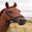

In [51]:
print(classes[testset.label[100]])
itorch.image(testset.data[100])

horse	


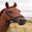

In [52]:
print(classes[testset.label[100]])
itorch.image(testset.data[100])

testset.data = testset.data:double()   -- convert from Byte tensor to Double tensor
for i=1,3 do -- over each image channel
    testset.data[{ {}, {i}, {}, {}  }]:add(-mean[i]) -- mean subtraction    
    testset.data[{ {}, {i}, {}, {}  }]:div(stdv[i]) -- std scaling
end


In [53]:
-- for fun, print the mean and standard-deviation of example-100
horse = testset.data[100]
print(horse:mean(), horse:std())

0.59066009532189	1.0665356205025	


horse	


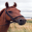

In [54]:
print(classes[testset.label[100]])
itorch.image(testset.data[100])
predicted = net:forward(testset.data[100])

In [55]:
print(predicted:exp())

 0.0225
 0.0154
 0.0549
 0.2022
 0.0769
 0.1933
 0.0231
 0.3050
 0.0096
 0.0970
[torch.DoubleTensor of size 10]



In [56]:
for i=1,predicted:size(1) do
    print(classes[i], predicted[i])
end

airplane	0.022525643152023	
automobile	0.01543048360784	
bird	0.0548588700917	
cat	0.20222203258894	
deer	0.076925268540162	
dog	0.19326944743958	
frog	0.023115088618948	
horse	0.30500353026259	
ship	0.0096236619962843	
truck	0.09702597370193	


In [57]:
correct = 0
for i=1,10000 do
    local groundtruth = testset.label[i]
    local prediction = net:forward(testset.data[i])
    local confidences, indices = torch.sort(prediction, true)  -- true means sort in descending order
    if groundtruth == indices[1] then
        correct = correct + 1
    end
end

print(correct, 100*correct/10000 .. ' % ')

4607	46.07 % 	


In [58]:
class_performance = {0, 0, 0, 0, 0, 0, 0, 0, 0, 0}
for i=1,10000 do
    local groundtruth = testset.label[i]
    local prediction = net:forward(testset.data[i])
    local confidences, indices = torch.sort(prediction, true)  -- true means sort in descending order
    if groundtruth == indices[1] then
        class_performance[groundtruth] = class_performance[groundtruth] + 1
    end
end

In [59]:
for i=1,#classes do
    print(classes[i], 100*class_performance[i]/1000 .. ' %')
end

airplane	31.9 %	
automobile	65.2 %	
bird	13 %	
cat	41.9 %	
deer	24.6 %	
dog	46.4 %	
frog	67.7 %	
horse	54.5 %	
ship	72.8 %	
truck	42.7 %	


In [247]:
require 'nn'
torch.manualSeed(1234)
input = torch.rand(1,3,8,8)

m = nn.SpatialConvolution(3,6,2,2)
-- print(m.weight:size())
o1 = m:forward(input)
-- print(output)

-- output = torch.rand(7)
-- c:forward(output, 2)

-- net:add(nn.View(16*5*5))
-- print(o1:size())
-- m2 = nn.View(3*7*7)
print(o1:size())
-- m2 = nn.View(-1):setNumInputDims(3)
m2 = nn.View(1)
o2 = m2:forward(o1)
print(o2:size())

-- m3 = nn.Linear(3*7*7, 5)
-- o3 = m3:forward(o2)
-- print(o3)

-- m4 = nn.SoftMax()
-- o4 = m4:forward(o3)
-- print(o4)


-- c = nn.ClassNLLCriterion()
-- loss = c:forward(o4, 1)
-- print(loss)

-- gradInput = c:updateGradInput(o4, 1)
-- print(gradInput)
-- c.gradInput

-- module:updateGradInput(input, criterion:updateGradInput(module.output, target))



-- print(m.output:size())
-- output = m:updateOutput(input):size()
-- print(m.output:size())
-- m.weight
-- criterion = nn.ClassNLLCriterion()


-- print(output)
-- print(m.weight)

-- criterion = nn.ClassNLLCriterion()

 1
 6
 7
 7
[torch.LongStorage of size 4]

 294
   1
[torch.LongStorage of size 2]



In [222]:
torch.manualSeed(1234)
criterion = nn.ClassNLLCriterion()
-- function softmax(X)
--     local num = X:exp()
--     local den = X:exp():sum()
--     return num:div(den)
-- end


-- probs = softmax(output)
-- print(softmax(output))

for i = 1,40 do
    loss = criterion:forward(output,2)
--     print('loss', loss)
    grad = criterion:backward(output, 2)
    output = output - (grad * 0.05)
end

-- print(softmax(output))

print(output)


./nn/ClassNLLCriterion.lua:44: attempt to index field 'THNN' (a nil value)
stack traceback:
	./nn/ClassNLLCriterion.lua:44: in function 'forward'
	[string "torch.manualSeed(1234)..."]:14: in main chunk
	[C]: in function 'xpcall'
	/home/vagrant/torch/install/share/lua/5.1/itorch/main.lua:210: in function </home/vagrant/torch/install/share/lua/5.1/itorch/main.lua:174>
	/home/vagrant/torch/install/share/lua/5.1/lzmq/poller.lua:75: in function 'poll'
	...e/vagrant/torch/install/share/lua/5.1/lzmq/impl/loop.lua:307: in function 'poll'
	...e/vagrant/torch/install/share/lua/5.1/lzmq/impl/loop.lua:325: in function 'sleep_ex'
	...e/vagrant/torch/install/share/lua/5.1/lzmq/impl/loop.lua:370: in function 'start'
	/home/vagrant/torch/install/share/lua/5.1/itorch/main.lua:389: in main chunk
	[C]: in function 'require'
	(command line):1: in main chunk
	[C]: at 0x00406670: 

In [7]:
-- for key,value in pairs(getmetatable(m)) do
--     print(key, value)
-- end

In [18]:
torch.type(input)

torch.DoubleTensor	


In [20]:
-- assert(input.THNN, torch.type(input))

In [22]:
-- input.THNN

In [ ]:
-- for key,value in pairs(getmetatable(o)) do
--     print(key, value)
-- end

In [ ]:

-- while true do
--   local currentError = 0
--   for t = 1,dataset:size() do
--      local example = dataset[shuffledIndices[t]]
--      local input = example[1]
--      local target = example[2]

--      currentError = currentError + criterion:forward(module:forward(input), target)

--      module:updateGradInput(input, criterion:updateGradInput(module.output, target))
--      module:accUpdateGradParameters(input, criterion.gradInput, currentLearningRate)

--      if self.hookExample then
--         self.hookExample(self, example)
--      end
--   end
--   currentError = currentError / dataset:size()
-- end




In [246]:
net = nn.Sequential()

-- 1 input image channel, 6 output channels, 5x5 convolution kernel
net:add(nn.SpatialConvolution(1, 6, 5, 5))

-- A max-pooling operation that looks at 2x2 windows and finds the max.
net:add(nn.SpatialMaxPooling(2,2,2,2))

-- non-linearity
net:add(nn.Tanh())

-- additional layers
net:add(nn.SpatialConvolution(6, 16, 5, 5))
net:add(nn.SpatialMaxPooling(2,2,2,2))
net:add(nn.Tanh())

-- reshapes from a 3D tensor of 16x5x5 into 1D tensor of 16*5*5
net:add(nn.View(-1):setNumInputDims(3))

-- fully connected layers (matrix multiplication between input and weights)
net:add(nn.Linear(16*5*5, 120))
net:add(nn.Tanh())
net:add(nn.Linear(120, 84))
net:add(nn.Tanh())

-- 10 is the number of outputs of the network (10 classes)
net:add(nn.Linear(84, 10))
print('Lenet5\n', tostring(net));

Lenet5
	nn.Sequential {
  [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> (7) -> (8) -> (9) -> (10) -> (11) -> (12) -> output]
  (1): nn.SpatialConvolution(1 -> 6, 5x5)
  (2): nn.SpatialMaxPooling(2x2, 2,2)
  (3): nn.Tanh
  (4): nn.SpatialConvolution(6 -> 16, 5x5)
  (5): nn.SpatialMaxPooling(2x2, 2,2)
  (6): nn.Tanh
  (7): nn.View(-1)
  (8): nn.Linear(400 -> 120)
  (9): nn.Tanh
  (10): nn.Linear(120 -> 84)
  (11): nn.Tanh
  (12): nn.Linear(84 -> 10)
}	


In [250]:
-- require 'mnist'

In [252]:
mnist = require 'mnist'